In [13]:
%matplotlib inline

In [176]:
import numpy as np
import matplotlib.pyplot as plt  # for plots
from sklearn import linear_model
from matplotlib import rc
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from scipy.stats import t
from sklearn.utils import resample
from math import *

print "Recuperation des jeux de donnees Airquality"

Recuperation des jeux de donnees Airquality


In [319]:
data_air_quality = sm.datasets.get_rdataset('airquality').data
print data_air_quality.head()
df_air_quality = data_air_quality.dropna()
print df_air_quality.head()
Y = df_air_quality['Ozone']
#F = {'Solar.R': df_air_quality['Solar.R'], 'Wind': df_air_quality['Wind'], 'Temp': df_air_quality['Temp'],'Month': df_air_quality['Month'], 'Day': df_air_quality['Day']}
#X = pd.DataFrame(F)
X = df_air_quality.drop(['Ozone'], 1)
print X.head()
X_scaled = preprocessing.scale(X)
print X_scaled.var()
model = linear_model.LinearRegression(fit_intercept= True )
model.fit(X_scaled, Y)

   Ozone  Solar.R  Wind  Temp  Month  Day
0     41      190   7.4    67      5    1
1     36      118   8.0    72      5    2
2     12      149  12.6    74      5    3
3     18      313  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5
   Ozone  Solar.R  Wind  Temp  Month  Day
0     41      190   7.4    67      5    1
1     36      118   8.0    72      5    2
2     12      149  12.6    74      5    3
3     18      313  11.5    62      5    4
6     23      299   8.6    65      5    7
   Solar.R  Wind  Temp  Month  Day
0      190   7.4    67      5    1
1      118   8.0    72      5    2
2      149  12.6    74      5    3
3      313  11.5    62      5    4
6      299   8.6    65      5    7
1.0


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [320]:
theta_hat = model.coef_
print "Le coefficient de mon modele est: "+ str(theta_hat)
print "La valeur a l'origine de mon modele est: "+ str(model.intercept_)
estimateur_sans_biais = 1./(len(Y)-np.ndim(X_scaled))*(((Y-np.dot(X_scaled, theta_hat))*)
print "L'estimateur sans biais de la variance est egale a "+ str(estimateur_sans_biais)

Le coefficient de mon modele est: [  4.56193076 -11.75277084  17.98521995  -4.45895297   2.37393859]
La valeur a l'origine de mon modele est: 42.0990990991
L'estimateur sans biais de la variance est egale a 2223.9634593


In [344]:
alpha = 1-0.99
n = len(Y)
p = X_scaled.shape[1]
interval = t.interval(alpha, n-p)
print interval
print interval[0]
print interval[1]

# Les intervalles de confiance des différents theta_j
mat_product = np.dot(X_scaled.transpose(),X_scaled)
inversed_mat = np.linalg.inv(mat_product)
j = 0

for theta_hat_j in theta_hat:
    borne_inf = theta_hat_j - interval[1]*((estimateur_sans_biais)**0.5)*(inversed_mat[j][j])**0.5
    print "borne inférieure de l'intervalle de confiance de theta " +str(theta_hat_j)+ "  est: " +str(borne_inf)
    borne_sup = theta_hat_j - interval[0]*(estimateur_sans_biais)**0.5*(inversed_mat[j][j])**0.5
    print "borne supérieure de l'intervalle de confiance de theta " + str(theta_hat_j)+ " est: "  + str(borne_sup)
    print "sa largeur est "+str(borne_sup-borne_inf)
    print "---------------------------------"
    j += 1



(-0.012563068696957329, 0.012563068696957329)
-0.012563068697
0.012563068697
borne inférieure de l'intervalle de confiance de theta 4.56193075918  est: 4.50157193983
borne supérieure de l'intervalle de confiance de theta 4.56193075918 est: 4.62228957853
sa largeur est 0.120717638695
---------------------------------
borne inférieure de l'intervalle de confiance de theta -11.7527708448  est: -11.8176062743
borne supérieure de l'intervalle de confiance de theta -11.7527708448 est: -11.6879354152
sa largeur est 0.129670859052
---------------------------------
borne inférieure de l'intervalle de confiance de theta 17.9852199495  est: 17.9114168121
borne supérieure de l'intervalle de confiance de theta 17.9852199495 est: 18.0590230869
sa largeur est 0.147606274747
---------------------------------
borne inférieure de l'intervalle de confiance de theta -4.45895296698  est: -4.522006987
borne supérieure de l'intervalle de confiance de theta -4.45895296698 est: -4.39589894696
sa largeur est 0.

In [347]:
#Prediction de la nouvelle variable
print "-------Prediction de la nouvelle variable----------"
non_sacled_model = linear_model.LinearRegression(fit_intercept= True )
non_sacled_model.fit(X, Y)
X_values = [197,10,70,3,1]
theta_hat_2 = non_sacled_model.coef_
print theta_hat_2
Y_to_predict = non_sacled_model.predict(X_values)
print Y_to_predict

-------Prediction de la nouvelle variable----------
[ 0.05027432 -3.31844386  1.89578642 -3.03995664  0.27387752]
[ 36.46233787]


In [182]:
#Exercice 2:
dataset = sm.datasets.get_rdataset("airquality").data   
dataset = dataset.dropna()
print dataset.head()
linear = linear_model.LinearRegression(fit_intercept=True)
theta = np.empty([1, 6])
#print theta
#theta_2 = np.zeros(shape=(1,5))
for i in range(10000):
    dataset_sample = resample(dataset) #Il faut shuffler le Dataset et non les X et les Y séparémment 
    X = dataset_sample.drop('Ozone', 1)
    X_sample = sm.add_constant(X)
    Y_sample = dataset_sample['Ozone']
    Samplemodel = linear_model.LinearRegression(fit_intercept=False)
    Samplemodel.fit(X_sample, Y_sample)
    theta_sample_i = Samplemodel.coef_
    theta_sample_i = np.expand_dims(theta_sample_i, axis=0)
    theta = np.append(theta, theta_sample_i, axis=0 )
#F = {'Solar.R': X_sample['Solar.R'], 'Wind': X_sample['Wind'], 'Temp': X_sample['Temp'],'Month': X_sample['Month'], 'Day': X_sample['Day']}
# dataset = pd.DataFrame(F,Y_sample)
print len(theta) #Il faut enlever la premiere ligne de chaque colonne dans le calcul de la moyenne et la mediane car np.empty ne donne pas une matrice vide



   Ozone  Solar.R  Wind  Temp  Month  Day
0     41      190   7.4    67      5    1
1     36      118   8.0    72      5    2
2     12      149  12.6    74      5    3
3     18      313  11.5    62      5    4
6     23      299   8.6    65      5    7
10001


In [183]:
print ("Theta_moyenne")
theta_moyenne = np.mean(theta,axis=0)
print theta_moyenne

print ("Theta_mediane")
Theta_mediane = np.median(theta,axis=0)
print Theta_mediane

Theta_moyenne
[ -6.45400339e+01   5.08625298e-02  -3.33579993e+00   1.89897379e+00
  -3.02557231e+00   2.73098930e-01]
Theta_mediane
[ -6.53084553e+01   5.05275228e-02  -3.28557363e+00   1.90278413e+00
  -3.01913593e+00   2.71590663e-01]


In [184]:
#Question2:
theta_sorted = np.sort(theta, axis=0) # on trie tous les theta_i pour chaque itération de notre bootstrap
index_inf = int(0.005*10000)
index_sup = int(0.995*10000)
borne_inf = theta_sorted[index_inf]
print borne_inf
borne_sup = theta_sorted[index_sup]
print borne_sup

[ -1.15174985e+02   1.33896874e-03  -5.78143190e+00   1.28055660e+00
  -6.45688596e+00  -3.42576048e-01]
[-7.00441244  0.10673808 -1.42766178  2.44761055  0.37268319  0.91653147]


[1, 501, 1001, 1501, 2001, 2501, 3001, 3501, 4001, 4501, 5001]
[0, 2, 5, 7, 10, 12, 15, 17, 20, 22, 25]
[-7.0654237676534732, -6.5929429055963951, -6.393002388025077, -6.3404797909282831, -6.2285504963668457, -6.2048183707328244, -6.1868894746392353, -6.1492325686462497, -6.1102691226224541, -6.0402359800861252, -6.0143298181073339]
[0, 498, 995, 1493, 1990, 2488, 2985, 3483, 3980, 4478, 4975]
[-7.0654237676534732, -4.8402812533532211, -4.4648645253815165, -4.2159264503973981, -4.040808284286479, -3.8949699838640441, -3.7578519603728977, -3.6302155679506036, -3.5099944466019171, -3.4013442869512582, -3.2924119273011825]


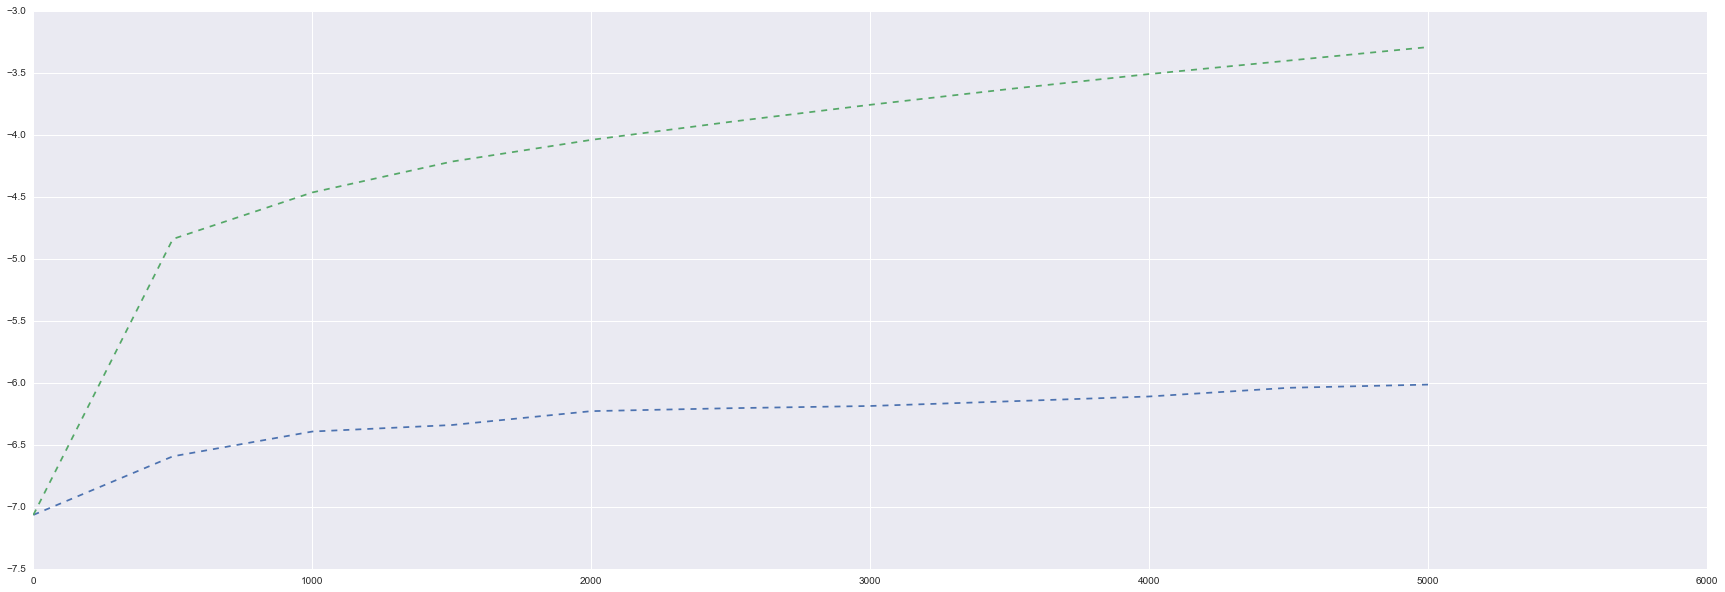

In [271]:
#Question3:
x = range(1,5002,500) #la plage de variation du B
print x
index_inf_ = [int(0.005*x[i]) for i in range(0,len(x))]
print index_inf_
y = []
for idx in index_inf_:
    y_int = theta_sorted[idx,2]
    y.append(y_int)
print y
index_sup_ = [int(0.995*x[i])for i in range(0,len(x))]
print index_sup_
S = []
for idx in index_sup_:
    S_int = theta_sorted[idx,2]
    S.append(S_int)
print S
fig = plt.figure(figsize=(30, 10), dpi=100)
plt.plot(x,y,'--')
plt.plot(x,S,'--')
plt.show()
#ajouter le trait de la médiane 

0    11.504167
1    11.504167
2    11.504167
3    11.504167
6    11.504167
Name: Wind_, dtype: float64
147    10.075862
148    10.075862
150    10.075862
151    10.075862
152    10.075862
Name: Wind_, dtype: float64


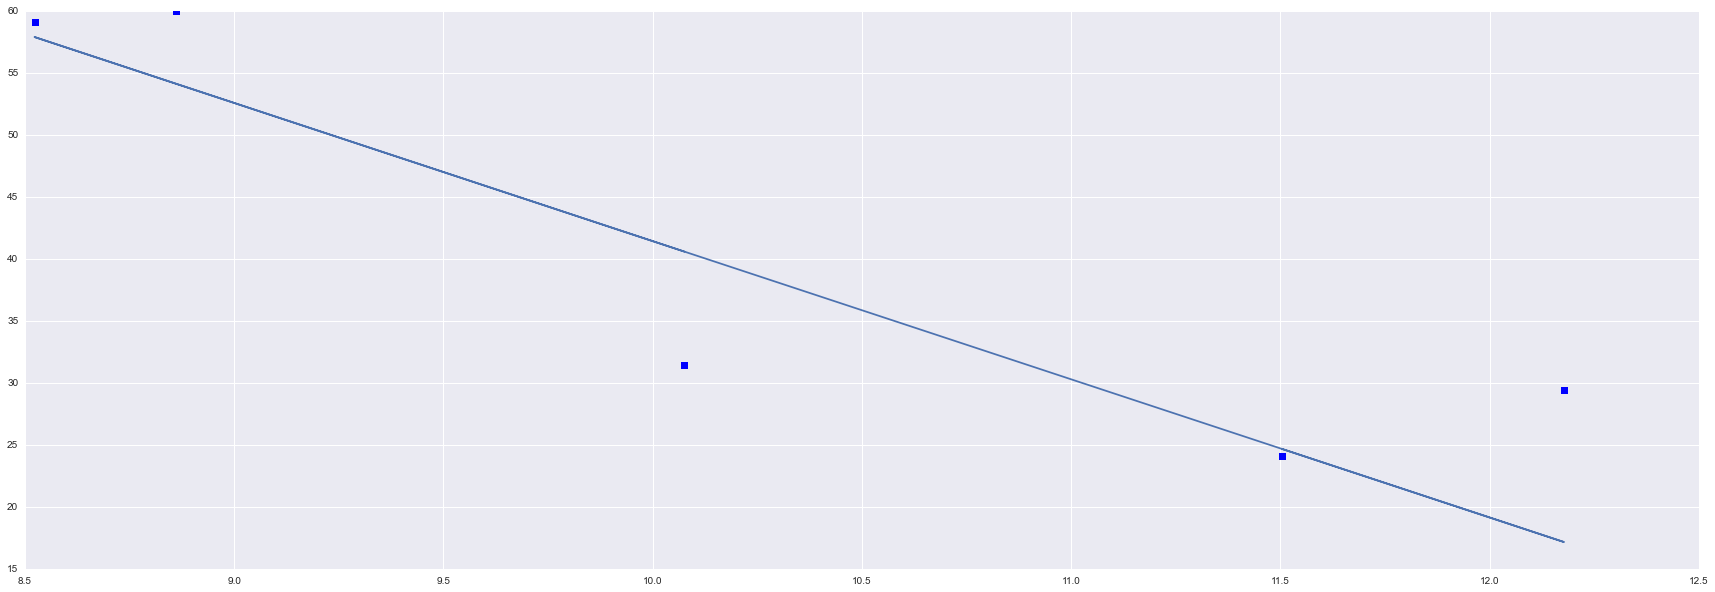

In [272]:
#Question4:
dataset['Wind_'] = dataset.groupby('Month')['Wind'].transform(np.mean)
dataset['Ozone_'] = dataset.groupby('Month')['Ozone'].transform(np.mean)

print dataset['Wind_'].head() 
print dataset['Wind_'].tail()

y = dataset['Ozone_']
X = dataset[['Wind_']]
linear.fit(X,y)
fig = plt.figure(figsize=(30, 10), dpi=100)
plt.plot(X,linear.predict(X))
plt.plot(X,y,'bs')
plt.show()


In [348]:
#Exercice 3:
data_ = sm.datasets.get_rdataset("airquality").data  
data_ = dataset.dropna()
X = data_.drop('Ozone', 1)  
Y = data_['Ozone']  
X_scaled = preprocessing.scale(X) 

def stpforward(X_scaled,Y,M):
    R = Y
    S = []
    alpha =[]
    for i in range(1,M):
        for j in range(0,X.shape[1]): 
            if  j not in S:
                alpha_j = np.dot(X_scaled[:,j],R)
                alpha.append(alpha_j)
            else:
                j += 1
        print alpha
        index_sup = alpha.index(max(alpha))
        S.append(index_sup)
        for j in S:
            X_s = X_s.append(X_scaled[:,j])
        model = linear_model.LinearRegression(fit_intercept= True )
        model.fit(X_s, Y)
        theta_int = model.coef_
        R = Y - np.dot(X_s,theta_int)
    theta_s = theta_int 
    print theta_s.shape()
    theta = np.zeros(len(X))
    k = 0
    for i in S:
        theta[i] = theta_s[k]
        k += 1
print theta
print S
    

[[  5.09952663e-316   5.09952663e-316   5.09952663e-316   5.09943177e-316
    5.09943177e-316   5.09943177e-316]
 [  1.90000000e+001   1.90000000e+001   1.90000000e+001   1.90000000e+001
    1.90000000e+001   1.90000000e+001]
 [ -6.63264626e+001   5.32519231e-002  -2.54335340e+000   1.72453692e+000
   -2.33995477e+000   3.20631036e-001]
 ..., 
 [ -8.93452971e+001   8.00121268e-002  -2.17924558e+000   1.94196081e+000
   -1.85089549e+000   4.38623176e-002]
 [ -5.22803721e+001   4.42643947e-002  -3.93403489e+000   1.76655399e+000
   -2.72290678e+000   4.20049585e-001]
 [ -5.53266600e+001   6.50368962e-002  -3.72707607e+000   1.66639047e+000
   -1.57091930e+000   2.89767257e-001]]
[1, 3, 5]


In [317]:
#stpforward(X_scaled,Y,3)